In [9]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
from keras.datasets import mnist
from keras import models
from keras import layers
from keras import optimizers
%matplotlib inline
plt.style.use('default')
import pandas_datareader.data as web
from datetime import datetime
end = datetime.now()
start = datetime(end.year-2, end.month, end.day)
import pandas.tseries
from statsmodels.tsa.stattools import adfuller
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import boxcox
import seaborn as sns
sns.set_style('whitegrid')
from matplotlib import colors
import warnings
warnings.filterwarnings('ignore')
from pandas.plotting import autocorrelation_plot
from pandas import concat
from matplotlib.pylab import rcParams
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from math import sqrt
from multiprocessing import cpu_count
import itertools
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
from datetime import datetime




In [10]:
#Import the dataset 
Apple = yf.Ticker('AAPL')
MSFT = yf.Ticker('MSFT')
SP_500=yf.Ticker('^GSPC')

In [11]:
dataset=Apple.history(period='max')
data_1 = SP_500.history(period='max')
data_2 =MSFT.history(period='max')

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10454 entries, 1980-12-12 to 2022-05-27
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          10454 non-null  float64
 1   High          10454 non-null  float64
 2   Low           10454 non-null  float64
 3   Close         10454 non-null  float64
 4   Volume        10454 non-null  int64  
 5   Dividends     10454 non-null  float64
 6   Stock Splits  10454 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 653.4 KB


In [13]:
plot_1 = data_1['2010':].iloc[:,1:2]
plot_2= dataset['2010':].iloc[:,1:2]
plot_3=data_2['2010':].iloc[:,1:2]

In [14]:
plot_1.rename(columns={'High':'SP500'},inplace=True)
plot_2.rename(columns={'High':'Apple'},inplace=True)
plot_3.rename(columns={'High':'Microsoft'},inplace=True)


In [15]:
COMBIN_2 =pd.concat([plot_1,plot_2,plot_3],axis=1).ffill().bfill()

In [19]:
new = normalize_data(COMBIN_2)

<Figure size 7500x4500 with 0 Axes>

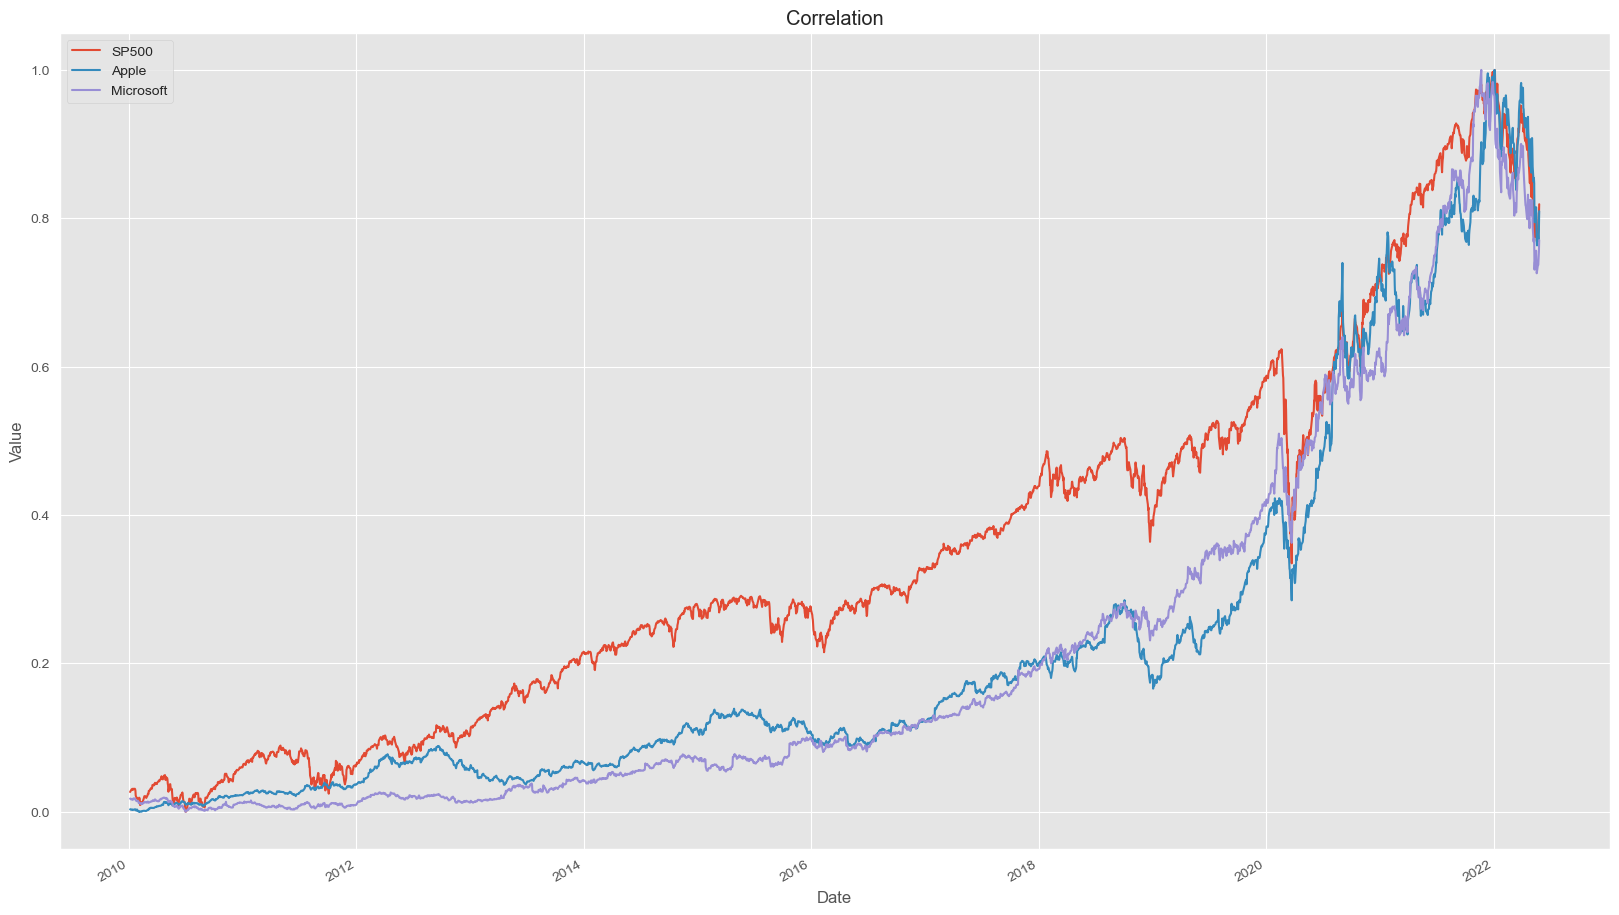

In [20]:
# Correlation PLot of SP500 and Apple 
plt.figure(figsize=(25, 15), dpi=300) 
new.plot(figsize=(20,12))
plt.title('Correlation')
plt.ylabel('Value')
plt.legend()

In [21]:
Stock=dataset

In [22]:
Stock.drop(columns=['Open','High','Low','Volume','Dividends','Stock Splits'],inplace=True)

In [23]:
Stock['Year']=Stock.index.year
Stock['Month']=Stock.index.strftime('%B')
Stock['dayofweek']=Stock.index.strftime('%A')
Stock['quarter']=Stock.index.quarter
Stock

,Close,Year,Month,dayofweek,quarter
Date,,,,,
1980-12-12,0.100178,1980,December,Friday,4
1980-12-15,0.094952,1980,December,Monday,4
1980-12-16,0.087983,1980,December,Tuesday,4
1980-12-17,0.090160,1980,December,Wednesday,4
1980-12-18,0.092774,1980,December,Thursday,4
...,...,...,...,...,...
2022-05-23,143.110001,2022,May,Monday,2
2022-05-24,140.360001,2022,May,Tuesday,2
2022-05-25,140.520004,2022,May,Wednesday,2


In [24]:
Stock=Stock['2010':]

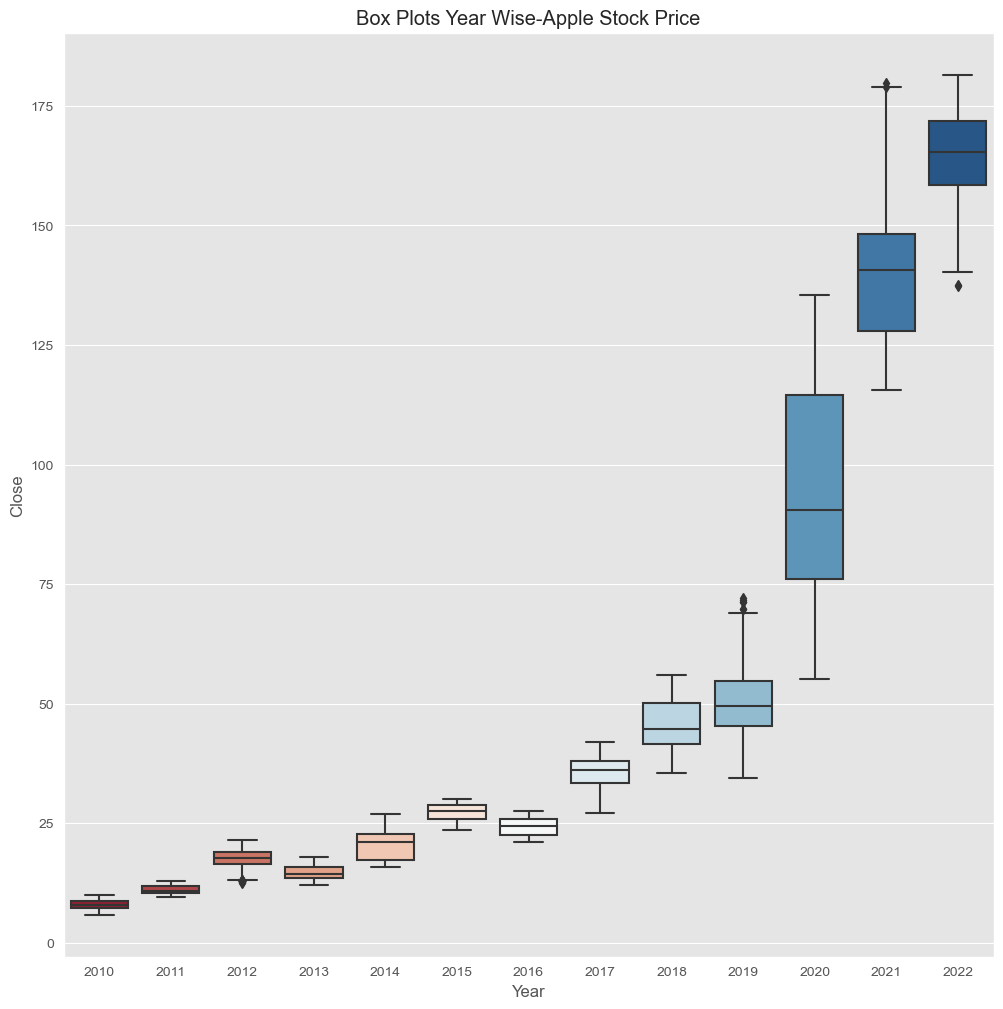

In [40]:
plt.figure(figsize=(12,12))
ax=sns.boxplot(x=Stock['Year'],y=Stock['Close'],palette='RdBu')
ax.set_title('Box Plots Year Wise-Apple Stock Price')
plt.style.context('fivethirtyeight')
#2021 was very Volatile mostly of the years 

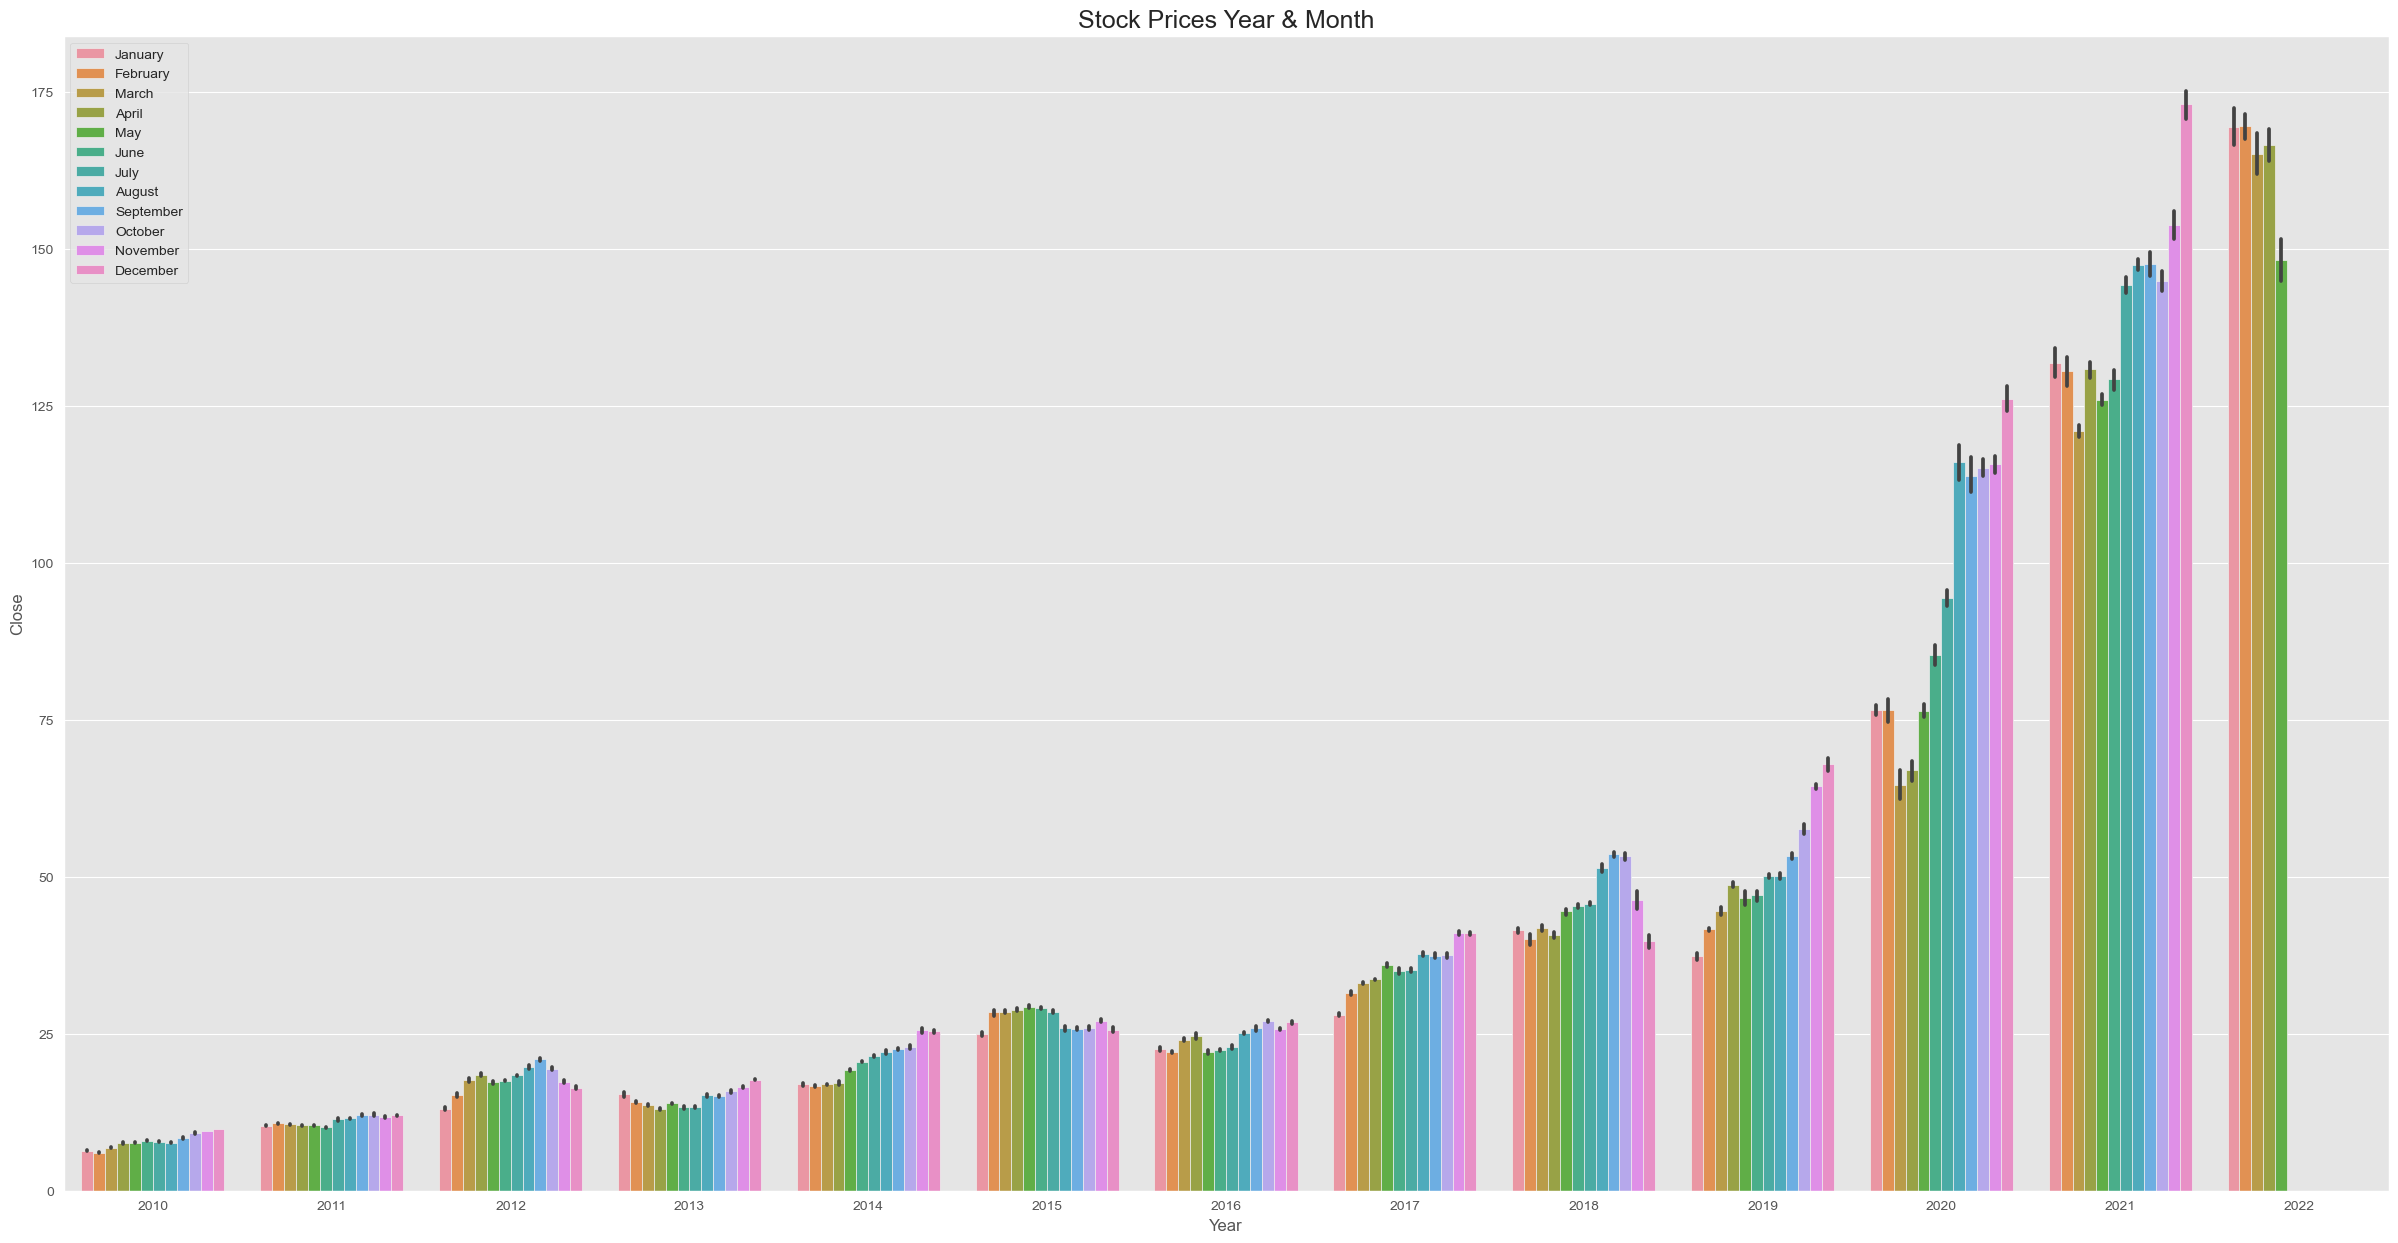

In [41]:
fig,ax=plt.subplots(figsize=(30,15))
palette=sns.color_palette('mako_r',6)
a=sns.barplot(x='Year',y='Close',hue='Month',data=Stock)
a.set_title('Stock Prices Year & Month',fontsize=18)
plt.legend(loc='upper left')
plt.show()
#Above figure shows that the Period from July-September seems to push stock price above in comparision to other months. 
# The primary reason for this is as Apple has a product cycle release date during this time,the Wallstreet is excited about upcoming products

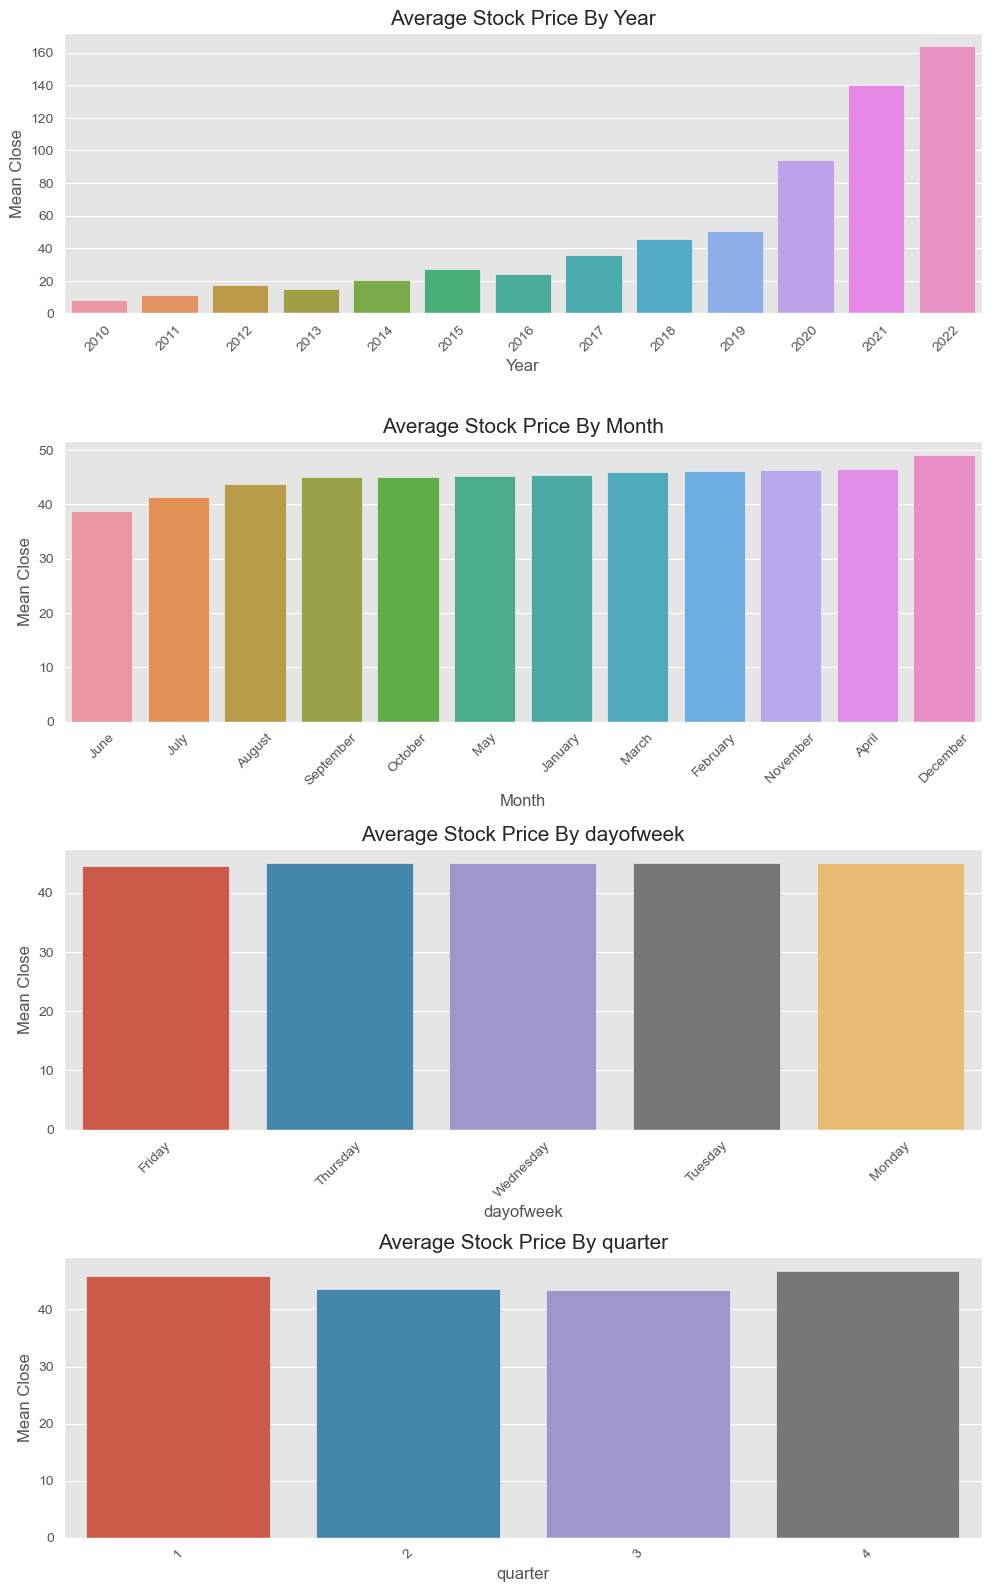

In [42]:
fig = plt.figure(figsize=(10,16))
fig.set_size_inches(10,16)
group_cols = Stock.columns

for enum,i in enumerate(group_cols[1:]):
  ax = fig.add_subplot(4,1,enum+1)
  Aggregated = pd.DataFrame(Stock.groupby(str(i))["Close"].mean()).reset_index().sort_values('Close')
  sns.barplot(data=Aggregated,x=str(i),y="Close",ax=ax)
  ax.set(xlabel=str(i), ylabel='Mean Close')
  ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)
  plt.xticks(rotation=45)
  
plt.tight_layout(pad=1)

#According to Mean price by Years, 2013 and 2016 are the only years where Mean price is lower than previous Year.
#Average Stock Price is lower at start of the week in comparision to the end of the week
#The Average Price is Highest in the Month of November
#Q4 is the best for Apple according to average stock price. By sales figures Q4 has always been strong for Apple 
# since the new product cycle takes place and its the Holiday period. We also observe this as a seasonal effect for Apple.


In [18]:
def normalize_data(df):
    # df on input should contain only one column with the price data (plus dataframe index)
    min = df.min()
    max = df.max()
    x = df 
    
    # time series normalization part
    # y will be a column in a dataframe
    y = (x - min) / (max - min)
    
    return y

In [25]:
# The data set is from 2010 till 2022
dataset =dataset['2010':]

In [26]:
#Making sure there is no null 
dataset.isnull().sum()

Close        0
Year         0
Month        0
dayofweek    0
quarter      0
dtype: int64

<AxesSubplot:>

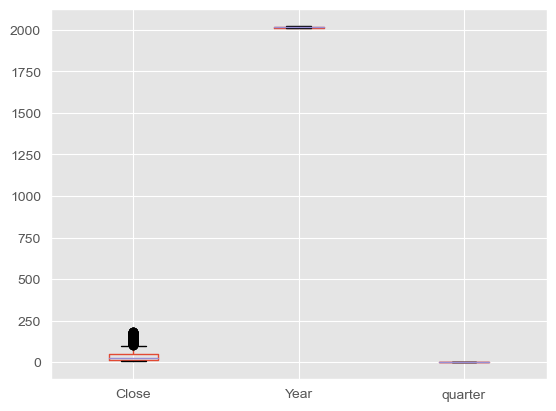

In [27]:
dataset.boxplot()

In [28]:
# Make the data ready for LSTM/GRU 
dataset

,Close,Year,Month,dayofweek,quarter
Date,,,,,
2010-01-04,6.535086,2010,January,Monday,1
2010-01-05,6.546384,2010,January,Tuesday,1
2010-01-06,6.442255,2010,January,Wednesday,1
2010-01-07,6.430345,2010,January,Thursday,1
2010-01-08,6.473097,2010,January,Friday,1
...,...,...,...,...,...
2022-05-23,143.110001,2022,May,Monday,2
2022-05-24,140.360001,2022,May,Tuesday,2
2022-05-25,140.520004,2022,May,Wednesday,2


In [29]:
#Function to assit 
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Apple Stock Price')
    plt.plot(predicted, color='blue',label='Predicted Apple Stock Price')
    plt.title('Apple Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Apple Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [49]:
dataset[:'2020'].iloc[:,0:1]

,Close
Date,
2010-01-04,6.535086
2010-01-05,6.546384
2010-01-06,6.442255
2010-01-07,6.430345
2010-01-08,6.473097
...,...
2020-12-24,130.802353
2020-12-28,135.480591
2020-12-29,133.676666


In [50]:
dataset['2021':].iloc[:,0:1]

,Close
Date,
2021-01-04,128.264999
2021-01-05,129.850830
2021-01-06,125.479851
2021-01-07,129.761642
2021-01-08,130.881638
...,...
2022-05-23,143.110001
2022-05-24,140.360001
2022-05-25,140.520004


In [51]:
training_set=dataset[:'2020'].iloc[:,0:1].values
test_set=dataset['2021':].iloc[:,0:1].values
#There are 2769 rows for teh traning set and 350 rows for the test set 


In [52]:
print(test_set.shape)
print(training_set.shape)

(354, 1)
(2769, 1)


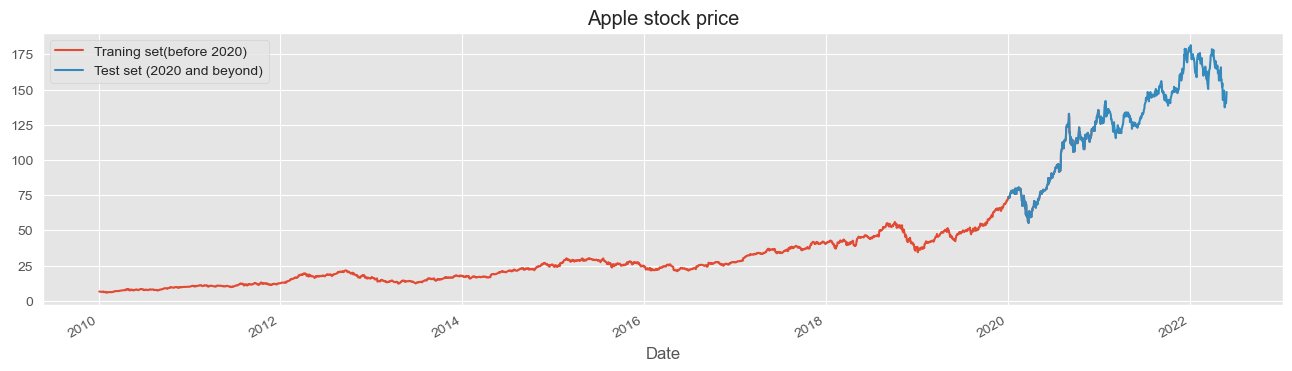

In [39]:
# Chosed 'Close' attribute for prices, this is how its looks 
dataset['Close'][:'2020'].plot(figsize=(16,4),legend=True)
dataset['Close']['2020':].plot(figsize=(16,4),legend=True)
plt.legend(['Traning set(before 2020)','Test set (2020 and beyond)'])
plt.title('Apple stock price')
plt.show()

In [94]:
#Scaling the Training set
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [95]:
# Since LSTMs store long term memory state, i created a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_train = []
y_train = []
for i in range(60,2769):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [96]:
X_train.shape,y_train.shape

((2709, 60), (2709,))

In [97]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_train.shape

(2709, 60, 1)

In [98]:
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=100, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=100, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=100))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))
# Compiling the RNN
regressor.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=150, verbose=0)

In [99]:
# Making the test set ready in a similar way as the training set.
# The following has been done so first 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
dataset_total = pd.concat((dataset["Close"][:'2020'],dataset["Close"]['2021':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [100]:
inputs.shape

(414, 1)

In [101]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,414):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

12/12 [==============================] - 2s 96ms/step


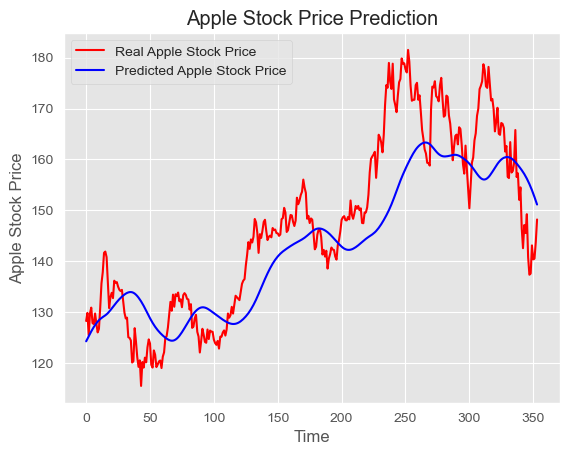

In [102]:
# Visualizing the results for LSTM
plot_predictions(test_set,predicted_stock_price)

In [103]:
# Evaluating our model
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 9.623946008748522.


In [ ]:
# GRU       

In [62]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=100, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=100, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=100, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=100, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=100,batch_size=150)

Epoch 1/100
19/19 [==============================] - 11s 309ms/step - loss: 0.0445
Epoch 2/100
19/19 [==============================] - 7s 348ms/step - loss: 0.0212
Epoch 3/100
19/19 [==============================] - 7s 343ms/step - loss: 0.0085
Epoch 4/100
19/19 [==============================] - 6s 310ms/step - loss: 0.0018
Epoch 5/100
19/19 [==============================] - 7s 366ms/step - loss: 8.8368e-04
Epoch 6/100
19/19 [==============================] - 6s 331ms/step - loss: 7.9206e-04
Epoch 7/100
19/19 [==============================] - 6s 322ms/step - loss: 7.2615e-04
Epoch 8/100
19/19 [==============================] - 6s 314ms/step - loss: 7.7443e-04
Epoch 9/100
19/19 [==============================] - 7s 345ms/step - loss: 7.5111e-04
Epoch 10/100
19/19 [==============================] - 7s 368ms/step - loss: 7.7851e-04
Epoch 11/100
19/19 [==============================] - 7s 346ms/step - loss: 7.7374e-04
Epoch 12/100
19/19 [==============================] - 7s 349ms/step

In [65]:
 #Preparing X_test and predicting the prices
X_test = []
for i in range(60,414):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

12/12 [==============================] - 1s 87ms/step


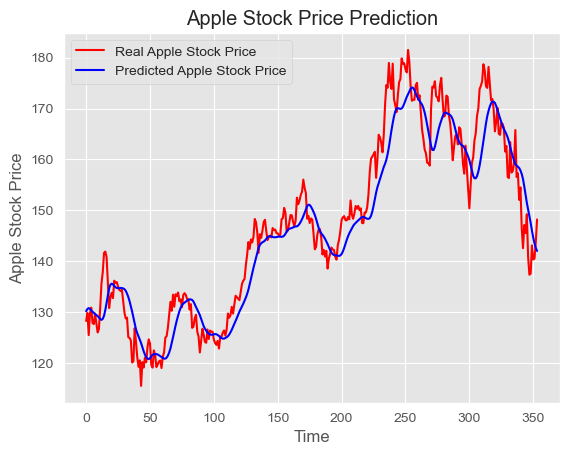

In [66]:
# Visualizing the results for GRU
plot_predictions(test_set,GRU_predicted_stock_price)

In [67]:
# Evaluating GRU
return_rmse(test_set,GRU_predicted_stock_price)

The root mean squared error is 5.354236409289067.


                New Model Prediction for the Years 2018-2019 



In [104]:
New_Data = dataset[:'2019']


In [70]:
New_Data[:'2019'].iloc[:,0:1]

,Close
Date,
2010-01-04,6.535086
2010-01-05,6.546384
2010-01-06,6.442255
2010-01-07,6.430345
2010-01-08,6.473097
...,...
2019-12-24,69.835602
2019-12-26,71.221161
2019-12-27,71.194122


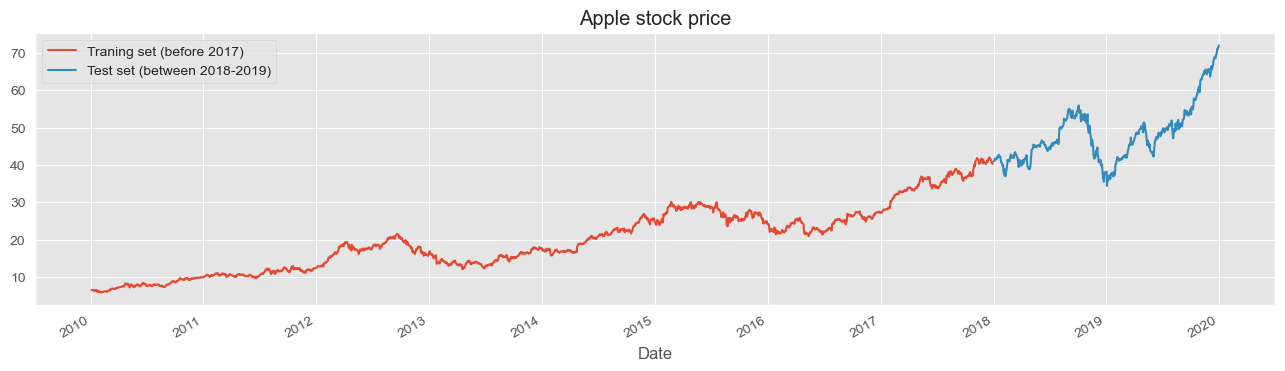

In [71]:
# Chosed 'High' attribute for prices, this is how its looks 
New_Data['Close'][:'2017'].plot(figsize=(16,4),legend=True)
New_Data['Close']['2018':].plot(figsize=(16,4),legend=True)
plt.legend(['Traning set (before 2017)','Test set (between 2018-2019)'])
plt.title('Apple stock price')
plt.show()

In [72]:
training_set_2=New_Data[:'2017'].iloc[:,0:1].values
test_set_2=New_Data['2018':].iloc[:,0:1].values
#There are 2013 rows for teh traning set and 251 rows for the test set 

In [73]:
#Function to assit 
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Apple Stock Price')
    plt.plot(predicted, color='blue',label='Predicted Apple Stock Price')
    plt.title('Apple Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Apple Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [74]:
#scaling 
sc_2=MinMaxScaler(feature_range=(0,1))
training_set_scaled_2 = sc.fit_transform(training_set_2)

In [75]:
# Create data strcture with 60 timesteps and 1 out put 
X_train_K = []
y_train_k =[]
for i in range(60,2013):
    X_train_K.append(training_set_scaled_2[i-60:i,0])
    y_train_k.append(training_set_scaled_2[i,0])
X_train_K, y_train_k = np.array(X_train_K), np.array(y_train_k)

In [76]:
# Reshaping X_train for efficient modelling
X_train_K = np.reshape(X_train_K, (X_train_K.shape[0],X_train_K.shape[1],1))

In [77]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_K.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True,input_shape=(X_train_K.shape[1],1)))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True,input_shape=(X_train_K.shape[1],1)))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')

# Fitting to the training set
regressor.fit(X_train_K,y_train_k,epochs=50,batch_size=150)

Epoch 1/50
14/14 [==============================] - 7s 158ms/step - loss: 0.0620
Epoch 2/50
14/14 [==============================] - 2s 124ms/step - loss: 0.0067
Epoch 3/50
14/14 [==============================] - 2s 128ms/step - loss: 0.0114
Epoch 4/50
14/14 [==============================] - 2s 120ms/step - loss: 0.0102
Epoch 5/50
14/14 [==============================] - 2s 123ms/step - loss: 0.0097
Epoch 6/50
14/14 [==============================] - 2s 128ms/step - loss: 0.0090
Epoch 7/50
14/14 [==============================] - 2s 143ms/step - loss: 0.0080
Epoch 8/50
14/14 [==============================] - 2s 117ms/step - loss: 0.0078
Epoch 9/50
14/14 [==============================] - 2s 134ms/step - loss: 0.0064
Epoch 10/50
14/14 [==============================] - 2s 160ms/step - loss: 0.0055
Epoch 11/50
14/14 [==============================] - 2s 139ms/step - loss: 0.0074
Epoch 12/50
14/14 [==============================] - 2s 141ms/step - loss: 0.0073
Epoch 13/50
14/14 [======

In [79]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
dataset_total_2 = pd.concat((New_Data["Close"][:'2017'],New_Data["Close"]['2018':]),axis=0)
inputs_2 = dataset_total_2[len(dataset_total_2)-len(test_set_2) - 60:].values
inputs_2 = inputs_2.reshape(-1,1)
inputs_2  = sc.transform(inputs_2)

In [ ]:
inputs_2.shape

(563, 1)

In [80]:
# Preparing X_test and predicting the prices
X_test_2_k = []
for i in range(60,563):
    X_test_2_k.append(inputs_2[i-60:i,0])
X_test_2_k = np.array(X_test_2_k)
X_test_2_k = np.reshape(X_test_2_k, (X_test_2_k.shape[0],X_test_2_k.shape[1],1))
predicted_stock_price_2 = regressor.predict(X_test_2_k)
predicted_stock_price_2 = sc.inverse_transform(predicted_stock_price_2)

16/16 [==============================] - 1s 16ms/step


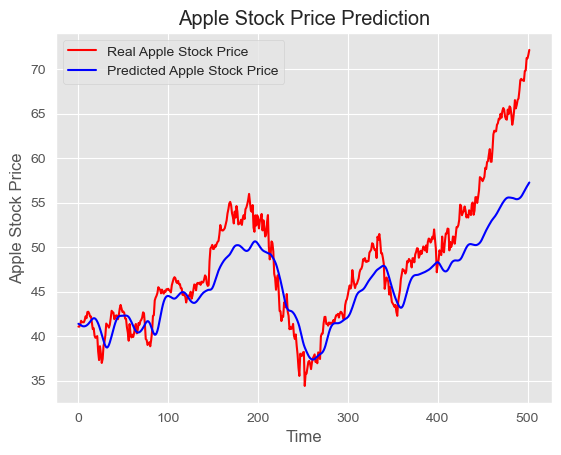

In [81]:
# Visualizing the results for LSTM
plot_predictions(test_set_2,predicted_stock_price_2)

In [82]:
# Evaluating our model
return_rmse(test_set_2,predicted_stock_price_2)

The root mean squared error is 4.1970011009555055.


In [83]:
#GRU
# The GRU architecture
regressorGRU_1 = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU_1.add(GRU(units=50, return_sequences=True, input_shape=(X_train_K.shape[1],1), activation='tanh'))
regressorGRU_1.add(Dropout(0.2))
# Second GRU layer
regressorGRU_1.add(GRU(units=50, return_sequences=True, input_shape=(X_train_K.shape[1],1), activation='tanh'))
regressorGRU_1.add(Dropout(0.2))
# Third GRU layer
regressorGRU_1.add(GRU(units=50, return_sequences=True, input_shape=(X_train_K.shape[1],1), activation='tanh'))
regressorGRU_1.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU_1.add(GRU(units=50, activation='tanh'))
regressorGRU_1.add(Dropout(0.2))
# The output layer
regressorGRU_1.add(Dense(units=1))
# Compiling the RNN
regressorGRU_1.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU_1.fit(X_train_K,y_train_k,epochs=50,batch_size=150)

Epoch 1/50
14/14 [==============================] - 6s 133ms/step - loss: 0.0954
Epoch 2/50
14/14 [==============================] - 2s 140ms/step - loss: 0.0487
Epoch 3/50
14/14 [==============================] - 2s 130ms/step - loss: 0.0313
Epoch 4/50
14/14 [==============================] - 2s 155ms/step - loss: 0.0155
Epoch 5/50
14/14 [==============================] - 2s 123ms/step - loss: 0.0054
Epoch 6/50
14/14 [==============================] - 2s 121ms/step - loss: 0.0030
Epoch 7/50
14/14 [==============================] - 2s 115ms/step - loss: 0.0032
Epoch 8/50
14/14 [==============================] - 1s 101ms/step - loss: 0.0027
Epoch 9/50
14/14 [==============================] - 2s 131ms/step - loss: 0.0028
Epoch 10/50
14/14 [==============================] - 2s 136ms/step - loss: 0.0027
Epoch 11/50
14/14 [==============================] - 2s 134ms/step - loss: 0.0028
Epoch 12/50
14/14 [==============================] - 1s 104ms/step - loss: 0.0025
Epoch 13/50
14/14 [======

In [84]:
# Preparing X_test and predicting the prices
X_test_2_k = []
for i in range(60,563):
    X_test_2_k.append(inputs_2[i-60:i,0])
X_test_2_k = np.array(X_test_2_k)
X_test_2_k = np.reshape(X_test_2_k, (X_test_2_k.shape[0],X_test_2_k.shape[1],1))
GRU_predicted_stock_price_1 = regressorGRU.predict(X_test_2_k)
GRU_predicted_stock_price_1 = sc.inverse_transform(GRU_predicted_stock_price_1)

16/16 [==============================] - 1s 69ms/step


In [85]:
GRU_predicted_stock_price_1.shape

(503, 1)

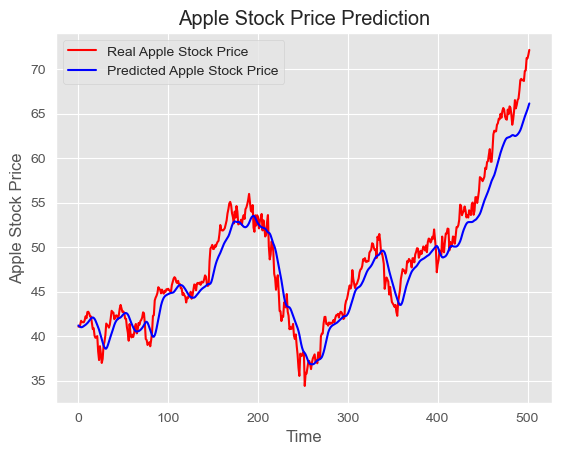

In [86]:
# Visualizing the results for GRU
plot_predictions(test_set_2,GRU_predicted_stock_price_1)

In [87]:
# Evaluating GRU
return_rmse(test_set_2,GRU_predicted_stock_price_1)

The root mean squared error is 2.1148852031449263.
